# Curso: CC521 A Programación Evolutiva 2022-1
Alumno: Jordi Joel Bardales Rojas

# Práctica dirigida: Representación y Selección 


In [1]:
from __future__ import annotations
import math
import numpy as np
from enum import Enum
from bin_repr import dec2bin, bin2gray, my_map, inverse_map, bin2dec, gray2bin
import copy
import random 
import matplotlib.pyplot as plt
from typing import Callable,  NamedTuple
from itertools import combinations
from abc import ABC, abstractmethod

class Representation(Enum):
    BIN = 0
    GRAY = 1
    DECIMAL = 2

# Problemas de optimización
Este laboratorio se mostrará varios métodos de selección como la selección proporcional, ranking lineal, torneo, uniforme y selección ruleta, luego se medirá la intensidad de selección en un problema de minimización.


## 1. Dado los siguientes problemas de minimización de una función $\min_\mathbf{x}f(\mathbf{x})$


In [2]:
f1 = lambda x: x[0]**4 + 5*x[0]**3 + 4*x[0]**2 - 4*x[0] + 1
f2 = lambda x: 0.2 + x[0]**2 + x[1]**2 - 0.1*math.cos(6*math.pi*x[0]) - 0.1*math.sin(6*math.pi*x[1])
f3 = lambda x: math.pow(1/6.931 - x[0]*x[1]/(x[2]*x[3]), 2)


Dominio

In [3]:
domain_1, n_var_1 = [-4.0, 1], 1
domain_2, n_var_2 = [-1, 1.0], 2
domain_3, n_var_3 = [12, 60.], 4


Parámetros del individuo tipados

In [4]:
class IndividualArguments(NamedTuple):
    domain: tuple[int, int]
    eps: float
    n_var: int
    gen_size: int
    default_repr: Representation = Representation.DECIMAL


Clase individuo 

In [5]:
class Individual():
    def __init__(self, phenotype: list[float], args: IndividualArguments):
        self.domain = args.domain
        self.eps = args.eps
        self.n_var = args.n_var
        self.gen_size = args.gen_size
        self.default_repr = args.default_repr
        self.phenotype = phenotype

    def getGenotype(self, my_repr: Representation = None):
        my_repr = self.default_repr if my_repr == None else my_repr
        list_repr: list[int] = []
        if my_repr == Representation.BIN:
            for gen in self.phenotype:
                list_repr.extend(dec2bin(num=my_map(gen, self.domain[0], self.domain[1], self.eps),
                                         bits=self.gen_size))
        elif my_repr == Representation.GRAY:
            for gen in self.phenotype:
                list_repr.extend(bin2gray(dec2bin(num=my_map(gen, self.domain[0], self.domain[1], self.eps),
                                                  bits=self.gen_size)))
        else:
            list_repr = copy.deepcopy(self.phenotype)
        return list_repr

    @classmethod
    def new(cls, genotype, args: IndividualArguments):
        phenotype: list[int] = []
        if args.default_repr == Representation.BIN:
            for k in range(args.n_var):
                gen = genotype[args.gen_size * k:args.gen_size * (k + 1)]
                phenotype.append(inverse_map(bin2dec(gen), args.domain[0], args.eps))
        elif args.default_repr == Representation.GRAY:
            for k in range(args.n_var):
                gen = genotype[args.gen_size * k:args.gen_size * (k + 1)]
                phenotype.append(inverse_map(bin2dec(gray2bin(gen)), args.domain[0], args.eps))
        else:
            phenotype = copy.deepcopy(genotype)

        return cls(phenotype, args)

    @staticmethod
    def newLike(genotype: list[int], parent: Individual):
        args = IndividualArguments(parent.domain, parent.eps, parent.n_var, parent.gen_size, parent.default_repr)
        return Individual.new(genotype, args)

    @classmethod
    def newRandom(cls, args: IndividualArguments):
        phenotype = [round(random.uniform(args.domain[0], args.domain[1]), 6) for _ in range(args.n_var)]
        return cls(phenotype, args)


### a) Representación del problema (1)
Implemente un programa en python que represente el cromosoma como una cadena binaria de 10 dígitos (10 bits) y muestre/imprima el Fenotipo y su representación binaria para una población de 10 individuos.

In [6]:
POPULATION_SIZE = 10
GEN_SIZE_1 = 10
eps_1 = (domain_1[1] - domain_1[0]) / (2**GEN_SIZE_1 - 1)
N_POINTS_1 = 2**GEN_SIZE_1

args1 = IndividualArguments(domain_1, eps_1, n_var_1, GEN_SIZE_1, f1)

population_1 = [Individual.newRandom(args1) for _ in range(POPULATION_SIZE)]
print("Representación binaria")
for i, ind in enumerate(population_1):
    print(f"Genotipo {i} = {ind.getGenotype(Representation.BIN)} Fenotipo {i} = {ind.phenotype}")


Representación binaria
Genotipo 0 = [0, 0, 0, 0, 0, 0, 0, 1, 0, 1] Fenotipo 0 = [-3.973393]
Genotipo 1 = [1, 0, 1, 0, 1, 1, 0, 0, 0, 0] Fenotipo 1 = [-0.638215]
Genotipo 2 = [1, 0, 1, 1, 0, 0, 1, 1, 0, 0] Fenotipo 2 = [-0.502098]
Genotipo 3 = [0, 0, 0, 1, 0, 0, 0, 1, 1, 1] Fenotipo 3 = [-3.653383]
Genotipo 4 = [1, 1, 1, 0, 1, 0, 0, 1, 1, 1] Fenotipo 4 = [0.568976]
Genotipo 5 = [1, 0, 0, 0, 0, 1, 0, 1, 0, 1] Fenotipo 5 = [-1.392798]
Genotipo 6 = [1, 0, 1, 1, 1, 0, 0, 0, 1, 0] Fenotipo 6 = [-0.393327]
Genotipo 7 = [1, 1, 0, 1, 0, 0, 0, 1, 0, 1] Fenotipo 7 = [0.090479]
Genotipo 8 = [1, 1, 0, 0, 0, 1, 0, 1, 1, 0] Fenotipo 8 = [-0.141014]
Genotipo 9 = [1, 0, 0, 1, 1, 0, 1, 1, 0, 1] Fenotipo 9 = [-0.963855]


Realizar lo mismo del ítem anterior para la representación en código de Gray.

In [7]:
print("Representación en código Gray")
for i, ind in enumerate(population_1):
    print(f"Genotipo {i} = {ind.getGenotype(Representation.GRAY)} Fenotipo {i} = {ind.phenotype}")

Representación en código Gray
Genotipo 0 = [0, 0, 0, 0, 0, 0, 0, 1, 1, 1] Fenotipo 0 = [-3.973393]
Genotipo 1 = [1, 1, 1, 1, 1, 0, 1, 0, 0, 0] Fenotipo 1 = [-0.638215]
Genotipo 2 = [1, 1, 1, 0, 1, 0, 1, 0, 1, 0] Fenotipo 2 = [-0.502098]
Genotipo 3 = [0, 0, 0, 1, 1, 0, 0, 1, 0, 0] Fenotipo 3 = [-3.653383]
Genotipo 4 = [1, 0, 0, 1, 1, 1, 0, 1, 0, 0] Fenotipo 4 = [0.568976]
Genotipo 5 = [1, 1, 0, 0, 0, 1, 1, 1, 1, 1] Fenotipo 5 = [-1.392798]
Genotipo 6 = [1, 1, 1, 0, 0, 1, 0, 0, 1, 1] Fenotipo 6 = [-0.393327]
Genotipo 7 = [1, 0, 1, 1, 1, 0, 0, 1, 1, 1] Fenotipo 7 = [0.090479]
Genotipo 8 = [1, 0, 1, 0, 0, 1, 1, 1, 0, 1] Fenotipo 8 = [-0.141014]
Genotipo 9 = [1, 1, 0, 1, 0, 1, 1, 0, 1, 1] Fenotipo 9 = [-0.963855]


Considerando las representaciones anteriores (cadena de 10 bits) ¿cual sería el tamaño del espacio intrínseco?


In [8]:
print(f"El espacio intrinseco tendría {N_POINTS_1} elementos con una precisión de {eps_1}")

El espacio intrinseco tendría 1024 elementos con una precisión de 0.004887585532746823


### b) Representación del problema (2):

Implemente un programa en python que represente el cromosoma como una cadena binaria donde $x, y$ estén representados por 5 bits cada uno y luego muestre/imprima el Fenotipo y su
representación binaria.

In [9]:
POPULATION_SIZE = 10
GEN_SIZE_2 = 5
eps_2 = (domain_2[1] - domain_2[0]) / (2**GEN_SIZE_2 - 1)
N_POINTS_2 = 2**GEN_SIZE_2

args2 = IndividualArguments(domain_2, eps_2, n_var_2, GEN_SIZE_2, f2)

population_2 = [Individual.newRandom(args2) for _ in range(POPULATION_SIZE)]
print("Representación binaria")
for i, ind in enumerate(population_2):
    print(f"Genotipo {i} = {ind.getGenotype(Representation.BIN)} Fenotipo {i} = {ind.phenotype}")

Representación binaria
Genotipo 0 = [0, 1, 1, 1, 1, 0, 1, 1, 1, 0] Fenotipo 0 = [-0.034078, -0.114507]
Genotipo 1 = [0, 1, 1, 1, 0, 1, 0, 0, 0, 0] Fenotipo 1 = [-0.128902, 0.028072]
Genotipo 2 = [1, 1, 1, 1, 0, 0, 1, 1, 1, 0] Fenotipo 2 = [0.965512, -0.125956]
Genotipo 3 = [0, 1, 0, 1, 1, 1, 0, 0, 1, 1] Fenotipo 3 = [-0.318014, 0.244446]
Genotipo 4 = [0, 1, 1, 0, 1, 0, 0, 1, 1, 1] Fenotipo 4 = [-0.187242, -0.559144]
Genotipo 5 = [1, 1, 0, 1, 1, 1, 1, 0, 0, 0] Fenotipo 5 = [0.755047, 0.577504]
Genotipo 6 = [1, 1, 1, 0, 0, 1, 1, 0, 1, 1] Fenotipo 6 = [0.818692, 0.757856]
Genotipo 7 = [0, 0, 1, 0, 0, 1, 0, 0, 1, 0] Fenotipo 7 = [-0.72384, 0.172695]
Genotipo 8 = [0, 0, 0, 0, 1, 1, 0, 1, 1, 0] Fenotipo 8 = [-0.938309, 0.396054]
Genotipo 9 = [1, 0, 0, 0, 1, 0, 0, 1, 0, 0] Fenotipo 9 = [0.113586, -0.753662]


Realizar lo mismo del ítem anterior para la representación en código de Gray

In [10]:
print("Representación en código Gray")
for i, ind in enumerate(population_2):
    print(f"Genotipo {i} = {ind.getGenotype(Representation.GRAY)} Fenotipo {i} = {ind.phenotype}")

Representación en código Gray
Genotipo 0 = [0, 1, 0, 0, 0, 0, 1, 0, 0, 1] Fenotipo 0 = [-0.034078, -0.114507]
Genotipo 1 = [0, 1, 0, 0, 1, 1, 1, 0, 0, 0] Fenotipo 1 = [-0.128902, 0.028072]
Genotipo 2 = [1, 0, 0, 0, 1, 0, 1, 0, 0, 1] Fenotipo 2 = [0.965512, -0.125956]
Genotipo 3 = [0, 1, 1, 1, 0, 1, 1, 0, 1, 0] Fenotipo 3 = [-0.318014, 0.244446]
Genotipo 4 = [0, 1, 0, 1, 1, 0, 0, 1, 0, 0] Fenotipo 4 = [-0.187242, -0.559144]
Genotipo 5 = [1, 0, 1, 1, 0, 1, 0, 1, 0, 0] Fenotipo 5 = [0.755047, 0.577504]
Genotipo 6 = [1, 0, 0, 1, 0, 1, 0, 1, 1, 0] Fenotipo 6 = [0.818692, 0.757856]
Genotipo 7 = [0, 0, 1, 1, 0, 1, 1, 0, 1, 1] Fenotipo 7 = [-0.72384, 0.172695]
Genotipo 8 = [0, 0, 0, 0, 1, 1, 1, 1, 0, 1] Fenotipo 8 = [-0.938309, 0.396054]
Genotipo 9 = [1, 1, 0, 0, 1, 0, 0, 1, 1, 0] Fenotipo 9 = [0.113586, -0.753662]


Realizar lo mismo del ítem anterior para la representación real

In [11]:
print("Representación real")
for i, ind in enumerate(population_2):
    print(f"Individuo {i} = {ind.phenotype}")

Representación real
Individuo 0 = [-0.034078, -0.114507]
Individuo 1 = [-0.128902, 0.028072]
Individuo 2 = [0.965512, -0.125956]
Individuo 3 = [-0.318014, 0.244446]
Individuo 4 = [-0.187242, -0.559144]
Individuo 5 = [0.755047, 0.577504]
Individuo 6 = [0.818692, 0.757856]
Individuo 7 = [-0.72384, 0.172695]
Individuo 8 = [-0.938309, 0.396054]
Individuo 9 = [0.113586, -0.753662]


Considerando las representaciones anteriores (cadena de 10 bits y representación real) ¿cual sería el tamaño del espacio intrínseco?


In [12]:
print(f"El espacio intrinseco tendría {N_POINTS_2} x {N_POINTS_2} = {2**(2*GEN_SIZE_2)} elementos con una precisión de {eps_2}")

El espacio intrinseco tendría 32 x 32 = 1024 elementos con una precisión de 0.06451612903225806


### c) Representación del problema (3):

Implemente un programa en python que represente el cromosoma como una cadena binaria donde $x_1, x_2, x_3, x_4$ estén representados por 6 bits cada uno y luego muestre/imprima el Fenotipo y su representación binaria.


In [13]:
POPULATION_SIZE = 10
GEN_SIZE_3 = 6
eps_3 = (60 - 12) / (2**GEN_SIZE_3 - 1)
N_POINTS_3 = 2**GEN_SIZE_3

args3 = IndividualArguments(domain_3, eps_3, n_var_3, GEN_SIZE_3, f3)

population_3 = [Individual.newRandom(args3) for _ in range(POPULATION_SIZE)]
print("Representación binaria")
for i, ind in enumerate(population_3):
    print(f"Genotipo {i} = {ind.getGenotype(Representation.BIN)} Fenotipo {i} = {ind.phenotype}")

Representación binaria
Genotipo 0 = [1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0] Fenotipo 0 = [48.102371, 43.650471, 12.484033, 41.080698]
Genotipo 1 = [0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1] Fenotipo 1 = [14.324769, 16.266444, 23.229431, 53.619417]
Genotipo 2 = [1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1] Fenotipo 2 = [54.595189, 28.352395, 41.579329, 57.188521]
Genotipo 3 = [0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1] Fenotipo 3 = [27.209021, 21.199294, 41.696521, 16.98298]
Genotipo 4 = [1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0] Fenotipo 4 = [53.992723, 21.068834, 19.400912, 24.359983]
Genotipo 5 = [1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1] Fenotipo 5 = [37.654413, 51.117603, 58.594478, 49.03283]
Genotipo 6 = [0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1] Fenotipo 6 = [14.794646, 57.5

Realizar lo mismo del ítem anterior para la representación en código de Gray

In [14]:
for i, ind in enumerate(population_3):
    print(f"Genotipo {i} = {ind.getGenotype(Representation.GRAY)} Fenotipo {i} = {ind.phenotype}")

Genotipo 0 = [1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1] Fenotipo 0 = [48.102371, 43.650471, 12.484033, 41.080698]
Genotipo 1 = [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0] Fenotipo 1 = [14.324769, 16.266444, 23.229431, 53.619417]
Genotipo 2 = [1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0] Fenotipo 2 = [54.595189, 28.352395, 41.579329, 57.188521]
Genotipo 3 = [0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0] Fenotipo 3 = [27.209021, 21.199294, 41.696521, 16.98298]
Genotipo 4 = [1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0] Fenotipo 4 = [53.992723, 21.068834, 19.400912, 24.359983]
Genotipo 5 = [1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1] Fenotipo 5 = [37.654413, 51.117603, 58.594478, 49.03283]
Genotipo 6 = [0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1] Fenotipo 6 = [14.794646, 57.587637, 57.885115, 15.94

Realizar lo mismo del ítem anterior para la representación real.

In [15]:
for i, ind in enumerate(population_3):
    print(f"Individuo {i} = {ind.getGenotype(Representation.DECIMAL)}")

Individuo 0 = [48.102371, 43.650471, 12.484033, 41.080698]
Individuo 1 = [14.324769, 16.266444, 23.229431, 53.619417]
Individuo 2 = [54.595189, 28.352395, 41.579329, 57.188521]
Individuo 3 = [27.209021, 21.199294, 41.696521, 16.98298]
Individuo 4 = [53.992723, 21.068834, 19.400912, 24.359983]
Individuo 5 = [37.654413, 51.117603, 58.594478, 49.03283]
Individuo 6 = [14.794646, 57.587637, 57.885115, 15.943264]
Individuo 7 = [52.335488, 51.249981, 17.957711, 50.737694]
Individuo 8 = [44.21225, 48.597074, 45.990606, 26.667194]
Individuo 9 = [51.592774, 12.411218, 42.433635, 51.146742]


Considerando las representaciones anteriores (cadena de bits, representación real) ¿cual seria el tamaño del espacio intrínseco

In [16]:
print(f"El espacio intrinseco tendría {N_POINTS_3}x{N_POINTS_3}x{N_POINTS_3}x{N_POINTS_3}={2**(4*GEN_SIZE_3)} elementos con una precisión de {eps_3}")

El espacio intrinseco tendría 64x64x64x64=16777216 elementos con una precisión de 0.7619047619047619


## 2. Gestión de la población: de la teoría se sabe que los métodos de selección son independientes del método de representación del algoritmo evolutivo, implemente los siguientes métodos de selección en python:

## Selection

In [17]:
class Selection(ABC):
    def __init__(self, num_individuals: int):
        self.num_individuals = num_individuals

    @abstractmethod
    def get_individuals(self, population: list[Individual], fitness: list[float]):
        pass

    @staticmethod
    def intensity(prev_fitness: list[float], curr_fitness: list[float]):
        prev_fitness = np.array(prev_fitness)
        curr_fitness = np.array(curr_fitness)
        mean_prev = np.mean(prev_fitness)   # f
        mean_curr = np.mean(curr_fitness)   # g
        std_prev = np.std(prev_fitness)     # f 
        return (mean_curr - mean_prev) / std_prev if std_prev != 0.0 else 0.0


De una población de 10 individuos se seleccionarán 5 individuos del problema 2

In [18]:
POPULATION_SIZE = 10
SELECTED_SIZE = 5
args2 = IndividualArguments(domain_2, eps_2, n_var_2, GEN_SIZE_2, Representation.GRAY)
initial_population = [Individual.newRandom(args2) for _ in range(POPULATION_SIZE)]
fitness_population = [f2(ind.phenotype) for ind in initial_population]
for i, ind in enumerate(initial_population):
    print(f"Individuo {i} = {ind.getGenotype(Representation.DECIMAL)}")

Individuo 0 = [-0.624736, 0.424578]
Individuo 1 = [-0.973763, -0.982139]
Individuo 2 = [0.211532, 0.563907]
Individuo 3 = [-0.099866, -0.303929]
Individuo 4 = [-0.882453, 0.263732]
Individuo 5 = [-0.360691, 0.352006]
Individuo 6 = [-0.555453, -0.188356]
Individuo 7 = [-0.923673, 0.03138]
Individuo 8 = [0.217721, -0.409983]
Individuo 9 = [0.087218, 0.637384]


### Método de selección proporcional

In [19]:
class ProportionalSelection(Selection):
    def __init__(self, num_individuals: int, delta: float = 0.0):
        super().__init__(num_individuals)
        # fi + 10, fi + 100
        self.delta = delta

    def get_individuals(self, population: list[Individual], fitness: list[float]):
        f_max = max(fitness)
        # individuos con menor fitness (f_max - f) tienen mayor probabilidad de ser seleccionados  
        # presión de selección
        fitness = f_max - np.array(fitness) + 1e-4 + self.delta
        distribution = fitness / fitness.sum()
        return random.choices(population, weights=distribution, k=self.num_individuals)


In [20]:
selected = ProportionalSelection(num_individuals=SELECTED_SIZE, delta=10).get_individuals(initial_population, fitness_population)
for i, ind in enumerate(selected):
    print(f"Individuo {i} = {ind.phenotype}")


Individuo 0 = [-0.555453, -0.188356]
Individuo 1 = [-0.882453, 0.263732]
Individuo 2 = [-0.360691, 0.352006]
Individuo 3 = [-0.882453, 0.263732]
Individuo 4 = [-0.923673, 0.03138]


### Método de selección basada en ranking lineal

In [21]:
class LinearRankingSelection(Selection):
    def __init__(self, num_individuals: int, s: float):
        super().__init__(num_individuals)
        self.s = s

    def get_individuals(self, population: list[Individual], fitness: list[float]):
        mu = len(population)
        pop_fit = zip(population, fitness)
        sorted_pop_fit = sorted(pop_fit, key=lambda val: val[1], reverse=True)
        pop_fit = list(zip(*sorted_pop_fit))
        distribution = [(2 - self.s) / mu + 2 * i * (self.s - 1) / (mu * (mu - 1)) for i in range(mu)]

        return random.choices(pop_fit[0], weights=distribution, k=self.num_individuals)


In [22]:
selected = LinearRankingSelection(num_individuals=SELECTED_SIZE, s=1.5).get_individuals(initial_population, fitness_population)
for i, ind in enumerate(selected):
    print(f"Individuo {i} = {ind.phenotype}")


Individuo 0 = [0.211532, 0.563907]
Individuo 1 = [-0.923673, 0.03138]
Individuo 2 = [-0.555453, -0.188356]
Individuo 3 = [-0.882453, 0.263732]
Individuo 4 = [-0.923673, 0.03138]


### Método de torneo

In [23]:
class TournamentSelection(Selection):
    def __init__(self, num_individuals: int, tournament_size: int):
        super().__init__(num_individuals)
        self.tournament_size = tournament_size

    def get_individuals(self, population: list[Individual], fitness: list[float]):
        pop_fit_zipped = list(zip(population, fitness))
        selected: list[Individual] = []
        for _ in range(self.num_individuals):
            candidates = random.choices(pop_fit_zipped, k=self.tournament_size)
            selected.append(min(candidates, key=lambda pop_fit: pop_fit[1])[0])
        return selected


In [24]:
selected = TournamentSelection(num_individuals=SELECTED_SIZE, tournament_size=5).get_individuals(initial_population, fitness_population)
for i, ind in enumerate(selected):
    print(f"Individuo {i} = {ind.phenotype}")


Individuo 0 = [-0.099866, -0.303929]
Individuo 1 = [-0.555453, -0.188356]
Individuo 2 = [-0.360691, 0.352006]
Individuo 3 = [-0.099866, -0.303929]
Individuo 4 = [-0.099866, -0.303929]


### Método de selección uniforme

In [25]:
class UniformSelection(Selection):
    def __init__(self, num_individuals: int):
        super().__init__(num_individuals)

    def get_individuals(self, population: list[Individual], fitness: list[float] = None):
        # por defecto el metodo choice implementa una distribucion uniforme
        return random.choices(population, k=self.num_individuals) 


In [26]:
selected = UniformSelection(num_individuals=SELECTED_SIZE).get_individuals(initial_population)
for i, ind in enumerate(selected):
    print(f"Individuo {i} = {ind.phenotype}")


Individuo 0 = [-0.973763, -0.982139]
Individuo 1 = [-0.360691, 0.352006]
Individuo 2 = [-0.882453, 0.263732]
Individuo 3 = [-0.099866, -0.303929]
Individuo 4 = [-0.624736, 0.424578]


### Método de de la ruleta

In [27]:
class RouletteSelection(Selection):
    def __init__(self, num_individuals: int):
        super().__init__(num_individuals)

    def get_individuals(self, population: list[Individual], fitness: list[float]):
        # individuos con menor fitness tienen mayor probabilidad de ser seleccionados
        # presion de seleccion
        f_max = max(fitness)
        fitness = f_max - np.array(fitness) + 1e-4
        distribution = np.array(fitness) / sum(fitness)
        # el metodo de la ruleta es similar a seleccionar elementos de una lista dada una distribucion de probabilidades
        return random.choices(population, weights=distribution, k=self.num_individuals)


In [28]:
selected = RouletteSelection(num_individuals=SELECTED_SIZE).get_individuals(initial_population, fitness_population)
for i, ind in enumerate(selected):
    print(f"Individuo {i} = {ind.phenotype}")


Individuo 0 = [-0.360691, 0.352006]
Individuo 1 = [0.211532, 0.563907]
Individuo 2 = [-0.923673, 0.03138]
Individuo 3 = [-0.923673, 0.03138]
Individuo 4 = [-0.360691, 0.352006]


## Crossover

In [29]:
class Crossover(ABC):
    def __init__(self, probability: float):
        self.probability = probability
    
    @abstractmethod
    def make(self, p1: Individual, p2: Individual):
        pass
        

### One-Point Crossover

In [30]:
class OnePointCrossover(Crossover):
    def __init__(self, probability: float):
        super().__init__(probability)

    def make(self, p1: Individual, p2: Individual):
        # dos hijos por pareja
        if random.random() < self.probability:
            c1 = copy.deepcopy(p1.getGenotype())
            c2 = copy.deepcopy(p2.getGenotype())
            point = random.randint(1, len(c1) - 2)

            c1[point:], c2[point:] = c2[point:], c1[point:]
            return Individual.newLike(c1, p1), Individual.newLike(c2, p2)
        return None

### N-Point Crossover

In [31]:
class NPointCrossover(Crossover):
    def __init__(self, probability: float, n: int):
        super().__init__(probability)
        self.n = n

    def make(self, p1: Individual, p2: Individual):
        # dos hijos por pareja
        if random.random() < self.probability:
            ps = random.sample(range(1, p1.gen_size * p1.n_var - 1), self.n)
            ps.append(0)
            ps.append(p1.gen_size * p1.n_var)
            ps = sorted(ps)
            c1 = copy.deepcopy(p1.getGenotype())
            c2 = copy.deepcopy(p2.getGenotype())
            for i in range(0, self.n + 1):
                if i % 2 == 0:
                    continue
                c1[ps[i]:ps[i + 1]], c2[ps[i]:ps[i + 1]] = c2[ps[i]:ps[i + 1]], c1[ps[i]:ps[i + 1]]

            return Individual.newLike(c1, p1), Individual.newLike(c2, p2)
        return None


### Shuffle Crossover

In [32]:
class ShuffleCrossover(Crossover):
    def __init__(self, probability: float):
        super().__init__(probability)

    def make(self, p1: Individual, p2: Individual):
        # dos hijos por pareja
        if random.random() < self.probability:
            index = list(range(0, p1.gen_size * p1.n_var))
            random.shuffle(index)

            p1_gen = np.array(p1.getGenotype())
            p2_gen = np.array(p2.getGenotype())

            c1 = np.copy(p1_gen[index])
            c2 = np.copy(p1_gen[index])
            temp = np.copy(p2_gen[index])

            point = random.randint(1, len(c1) - 2)
            # slice swap list isn't equals that slice in numpy
            c1[point:], c2[:point] = temp[point:], temp[:point]

            c1_unshuffle = np.zeros_like(c1, dtype=int)
            c2_unshuffle = np.zeros_like(c2, dtype=int)

            c1_unshuffle[index] = c1[index]
            c2_unshuffle[index] = c2[index]
            return Individual.newLike(c1_unshuffle, p1), Individual.newLike(c2_unshuffle, p2)
        return None


### Uniform Crossover

In [33]:
class UniformCrossover(Crossover):
    def __init__(self, probability: float, swap_probability: float):
        super().__init__(probability)
        self.swap_probability = swap_probability

    def make(self, p1: Individual, p2: Individual):
        # dos hijos por pareja
        if random.random() < self.probability:
            # swap a random position i
            c1 = copy.deepcopy(p1.getGenotype())
            c2 = copy.deepcopy(p2.getGenotype())

            for i in range(p1.gen_size * p1.n_var):
                if random.random() < self.swap_probability:
                    c1[i], c2[i] = c2[i], c1[i]
            return Individual.newLike(c1, p1), Individual.newLike(c2, p2)
        return None


## Mutation

In [34]:
class Mutation(ABC):
    def __init__(self, probability: float):
        self.probability = probability
    
    @abstractmethod
    def make(self, p1: Individual, p2: Individual):
        pass
        

In [35]:
class OneFlipMutation(Mutation):
    def __init__(self, probability: float):
        super().__init__(probability)

    def make(self, ind: Individual):
        mut = copy.deepcopy(ind.getGenotype())
        if random.random() < self.probability:
            # punto aleatorio de la cadena
            point = random.randint(0, len(mut) - 1)

            if len(mut) > ind.n_var:
                mut[point] = (mut[point] + 1) % 2
            else:
                mut[point] = random.uniform(ind.domain[0], ind.domain[1])
            return Individual.newLike(mut, ind)
        return None

In [36]:
class UniformMutation(Mutation):
    def __init__(self, probability: float):
        super().__init__(probability)

    def make(self, ind: Individual):
        mut = copy.deepcopy(ind.getGenotype())
        if random.random() < self.probability:
            # punto aleatorio de la cadena
            p = 0.5
            for i in range(len(mut)):
                if random.random() < p:
                    mut[i] = (mut[i] + 1) % 2
            return Individual.newLike(mut, ind)
        return None


In [37]:
class SwapMutation(Mutation):
    def __init__(self, probability: float):
        super().__init__(probability)

    def make(self, ind: Individual):
        mut = copy.deepcopy(ind.getGenotype())
        if ind.default_repr != Representation.DECIMAL:
            if random.random() < self.probability:
                i, j = random.sample(range(len(mut)), k=2)
                mut[i], mut[j] = mut[j], mut[i]
                return Individual.newLike(mut, ind)
        return None


In [38]:
class ReversingMutation(Mutation):
    def __init__(self, probability: float):
        super().__init__(probability)

    def make(self, ind: Individual):
        mut = copy.deepcopy(ind.getGenotype())
        if ind.default_repr != Representation.DECIMAL:
            if random.random() < self.probability:
                point = random.randint(0, len(mut) - 2)
                mut[point] = (mut[point + 1] + 1) % 2
                return Individual.newLike(mut, ind)
        return None


### Esquema general de un AE genérico 

In [39]:
def genenetic_algorithm(max_generation: int,
                        fitness: Callable[[list[float]], float],
                        population: list[Individual],
                        selection: Selection,
                        crossover: Crossover,
                        mutation: Mutation):
    best: list[Individual] = []
    generation_number = 0
    while generation_number < max_generation:
        generation_number += 1
        # evaluacion de la aptitud de la población inicial (n individuos)
        population_fitness = [fitness(ind.phenotype) for ind in population]
        # seleccion de los padres (para la reproducción)
        parents = selection.get_individuals(population, population_fitness)
        # operadores de variación
        offspring: list[Individual] = []
        # crossover
        for p1, p2 in zip(parents[0::2], parents[1::2]):
            if (childs := crossover.make(p1, p2)) != None:
                offspring += childs
        # mutation
        for ind in parents:
            if (mutant := mutation.make(ind)) != None:
                offspring.append(mutant)
        # evaluacion de la aptitud de los λ descendientes
        offspring_fitness = [fitness(ind.phenotype) for ind in offspring]

        prev_fitness = copy.deepcopy(population_fitness)
        # λ individuos aptos + n padres
        population += offspring
        population_fitness += offspring_fitness
        # seleccionamos un individuo para la grafica
        best.append(population[random.randint(0, len(population) - 1)])
        # selección del ambiente n
        population = selection.get_individuals(population, population_fitness)

        curr_fitness = [fitness(ind.phenotype) for ind in population]
        S = selection.intensity(prev_fitness, curr_fitness)

        # impresión de la generación
        if generation_number % int(max_generation / 10) == 0:
            print(f"Generación: {generation_number}, número de descendientes: {len(offspring)}, intensidad: {S}")

    plt.plot([fitness(x.phenotype) for x in best], "r-")
    plt.title(f"{selection.__class__.__name__}, {crossover.__class__.__name__} & {mutation.__class__.__name__}\nGeneration number {generation_number}")
    plt.ylabel("Fitness")
    plt.xlabel("Generation")
    plt.show()
    return best


## 3. Evaluación de la intensidad de selección: para los problemas planteados en la pregunta (1) evaluar la presión de selección considerando los siguientes casos.
**Importante**: El número de descendientes está dado de manera probabiliística por los operadores de variación, por lo que es complicado establecer un número fijo de descendientes, sin embargo, tendrá el casi el mismo número según la cantidad de padres que se apareen, pues si son 10 padres, cada 2 parejas pueden tener 2 hijos, habrá alrededor de 8, 9 o 10 descendientes.


#### a) Para el primer caso (ecuación 1) considerar la representación binaria, una población inicial 15 individuos del cual debe seleccionar 10 padres y crear 10 descendientes, una taza de cruce de 0.8, una tasa de mutación de 0.01, donde el cruce y la mutación son seleccionadas de forma aleatoria (Usando los mismos criterios del ejemplo mostrado en Colab-note) realizar lo siguiente:

• Usando el método de torneo para la selección de las nuevas generaciones (constantes de 15 individuos)


Generación: 1, número de descendientes: 8, intensidad: -1.2830433621120527
Generación: 2, número de descendientes: 14, intensidad: -0.5952867274918677
Generación: 3, número de descendientes: 7, intensidad: -0.5428822162011948
Generación: 4, número de descendientes: 7, intensidad: 0.0
Generación: 5, número de descendientes: 8, intensidad: 0.0
Generación: 6, número de descendientes: 9, intensidad: 0.0
Generación: 7, número de descendientes: 8, intensidad: 0.0
Generación: 8, número de descendientes: 12, intensidad: 0.0
Generación: 9, número de descendientes: 9, intensidad: 0.0
Generación: 10, número de descendientes: 12, intensidad: 0.0


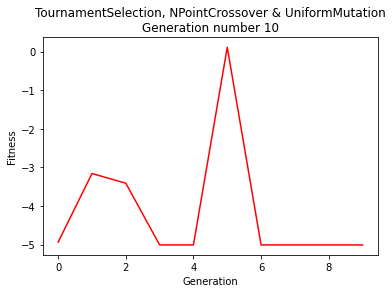

In [40]:
# GA CANONICAL HYPERPARAMETERS
MAX_GENERATION = 10
POPULATION_SIZE = 15
SELECTED_SIZE = 10
# NOTA: El número de descendientes está dado de manera estocástica según los operadores de variación, así que es complicado establecer un número fijo de descendientes
# sin embargo rondará los 10 individuos.
OFFSPRING_SIZE = 10
CROSSOVER_PROBABILITY = 0.8
MUTATION_PROBABILITY = 0.01

args = IndividualArguments(domain_1, eps_1, n_var_1, GEN_SIZE_1, Representation.GRAY)
initial_population = [Individual.newRandom(args) for _ in range(POPULATION_SIZE)]

# PIPELINE GA TOURNAMENT SELECTION
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f1,
                           population=initial_population,
                           selection=TournamentSelection(num_individuals=SELECTED_SIZE, tournament_size=3),
                           crossover=NPointCrossover(probability=CROSSOVER_PROBABILITY, n=2),
                           mutation=UniformMutation(probability=0.1))


In [41]:
ind = initial_population[0]
print(ind.getGenotype())
child = UniformMutation(1).make(ind)
print(child.getGenotype())


[0, 0, 0, 0, 1, 0, 0, 0, 1, 1]
[1, 1, 1, 0, 0, 1, 0, 0, 0, 0]


Generación: 1, número de descendientes: 10, intensidad: -0.8730719618653247
Generación: 2, número de descendientes: 10, intensidad: -1.1048594944586332
Generación: 3, número de descendientes: 8, intensidad: -0.8319962372075357
Generación: 4, número de descendientes: 10, intensidad: 0.0
Generación: 5, número de descendientes: 6, intensidad: 0.0
Generación: 6, número de descendientes: 6, intensidad: 0.0
Generación: 7, número de descendientes: 8, intensidad: 0.0
Generación: 8, número de descendientes: 6, intensidad: 0.0
Generación: 9, número de descendientes: 10, intensidad: 0.0
Generación: 10, número de descendientes: 8, intensidad: 0.0


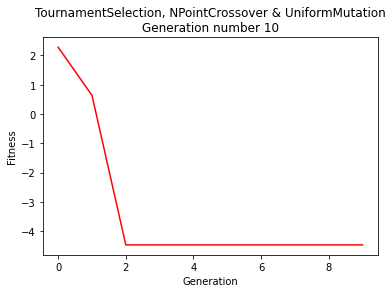

In [42]:
# GA CANONICAL HYPERPARAMETERS
MAX_GENERATION = 10
POPULATION_SIZE = 15
SELECTED_SIZE = 10
CROSSOVER_PROBABILITY = 0.8
MUTATION_PROBABILITY = 0.01

args = IndividualArguments(domain_1, eps_1, n_var_1, GEN_SIZE_1, Representation.GRAY)
initial_population = [Individual.newRandom(args) for _ in range(POPULATION_SIZE)]

# PIPELINE GA TOURNAMENT SELECTION
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f1,
                           population=initial_population,
                           selection=TournamentSelection(num_individuals=SELECTED_SIZE, tournament_size=3),
                           crossover=NPointCrossover(probability=CROSSOVER_PROBABILITY, n=2),
                           mutation=UniformMutation(probability=MUTATION_PROBABILITY))


#### Evalúe la intensidad de selección para cada uno de los métodos de selección en la pregunta (2).

In [43]:
solution = min(best, key=lambda x: f1(x.phenotype))
print(f"Optimal value with Tournament Selection\n x* = {solution.phenotype}, f(x*) = {f1(solution.phenotype)}")

Optimal value with Tournament Selection
 x* = [-2.734115347018573], f(x*) = -4.47343284158822


Generación: 1, número de descendientes: 6, intensidad: -1.1925412871791314
Generación: 2, número de descendientes: 10, intensidad: -0.1451788238616627
Generación: 3, número de descendientes: 11, intensidad: -0.08561719202730518
Generación: 4, número de descendientes: 8, intensidad: -0.13769576559297508
Generación: 5, número de descendientes: 10, intensidad: 0.08873015383719424
Generación: 6, número de descendientes: 8, intensidad: -0.5604702776263769
Generación: 7, número de descendientes: 6, intensidad: 0.2244779347917085
Generación: 8, número de descendientes: 6, intensidad: -0.03194188231419825
Generación: 9, número de descendientes: 8, intensidad: 0.07237983167810531
Generación: 10, número de descendientes: 10, intensidad: -0.20105229940923608


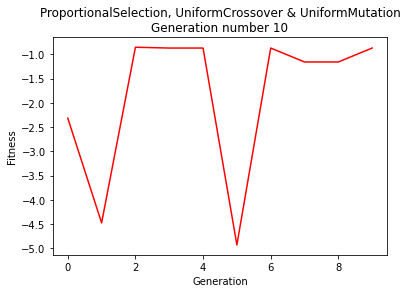

In [44]:
# PIPELINE GA PROPORTIONAL SELECTION
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f1,
                           population=initial_population,
                           selection=ProportionalSelection(num_individuals=SELECTED_SIZE, delta=10),
                           crossover=UniformCrossover(probability=CROSSOVER_PROBABILITY, swap_probability=0.5),
                           mutation=UniformMutation(probability=MUTATION_PROBABILITY))


In [45]:
solution = min(best, key=lambda x: f1(x.phenotype))
print(f"Optimal value with Proportional Selection\n x* = {solution.phenotype}, f(x*) = {f1(solution.phenotype)}")

Optimal value with Proportional Selection
 x* = [-2.870967741935484], f(x*) = -4.927351949766155


Generación: 1, número de descendientes: 9, intensidad: -0.9532968866032757
Generación: 2, número de descendientes: 10, intensidad: -0.6713681147335184
Generación: 3, número de descendientes: 9, intensidad: -0.728703256163023
Generación: 4, número de descendientes: 9, intensidad: -1.0212847643172673
Generación: 5, número de descendientes: 10, intensidad: -0.5226664938445498
Generación: 6, número de descendientes: 9, intensidad: 0.0
Generación: 7, número de descendientes: 10, intensidad: 0.0
Generación: 8, número de descendientes: 10, intensidad: -1.1658496443040904
Generación: 9, número de descendientes: 9, intensidad: -1.0754283708663122
Generación: 10, número de descendientes: 11, intensidad: -1.7633000790017195


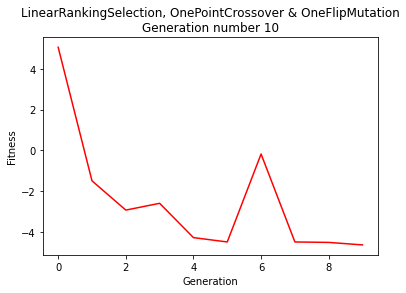

In [46]:
# PIPELINE GA LINEAR RANKING SELECTION
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f1,
                           population=initial_population,
                           selection=LinearRankingSelection(num_individuals=SELECTED_SIZE, s=2),
                           crossover=OnePointCrossover(probability=0.8),
                           mutation=OneFlipMutation(probability=0.1))


Generación: 1, número de descendientes: 8, intensidad: -0.489897689836177
Generación: 2, número de descendientes: 12, intensidad: -0.8569102171450402
Generación: 3, número de descendientes: 10, intensidad: -0.49076258190598204
Generación: 4, número de descendientes: 10, intensidad: -0.8791038535922968
Generación: 5, número de descendientes: 8, intensidad: -1.7072507923996467
Generación: 6, número de descendientes: 7, intensidad: -1.2177073855103486
Generación: 7, número de descendientes: 10, intensidad: -0.8417607741768581
Generación: 8, número de descendientes: 7, intensidad: -0.4406111858265423
Generación: 9, número de descendientes: 11, intensidad: -0.3333333333333333
Generación: 10, número de descendientes: 10, intensidad: 0.0


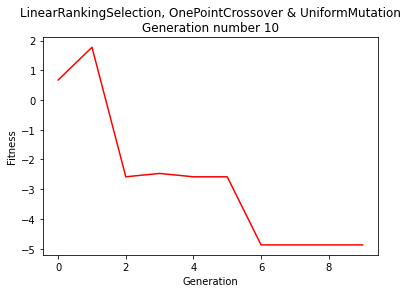

In [47]:
# PIPELINE GA LINEAR RANKING SELECTION
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f1,
                           population=initial_population,
                           selection=LinearRankingSelection(num_individuals=SELECTED_SIZE, s=2),
                           crossover=OnePointCrossover(probability=0.8),
                           mutation=UniformMutation(probability=0.1))


In [48]:
solution = min(best, key=lambda x: f1(x.phenotype))
print(f"Optimal value with Linear Ranking Selection\n x* = {solution.phenotype}, f(x*) = {f1(solution.phenotype)}")

Optimal value with Linear Ranking Selection
 x* = [-3.0664711632453567], f(x*) = -4.874014031751251


Generación: 1, número de descendientes: 10, intensidad: 0.30171310414151264
Generación: 2, número de descendientes: 10, intensidad: 0.0009643698438907802
Generación: 3, número de descendientes: 10, intensidad: -0.3252967057419954
Generación: 4, número de descendientes: 7, intensidad: -0.4118718862884051
Generación: 5, número de descendientes: 10, intensidad: 0.42094070054704485
Generación: 6, número de descendientes: 10, intensidad: -0.41757168595500493
Generación: 7, número de descendientes: 6, intensidad: 0.14341728012142427
Generación: 8, número de descendientes: 8, intensidad: 0.4242473356952996
Generación: 9, número de descendientes: 2, intensidad: 0.6102993270092428
Generación: 10, número de descendientes: 6, intensidad: -0.3333333333333332


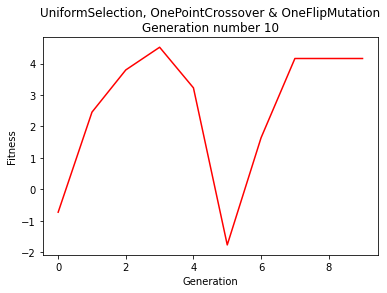

In [49]:
# PIPELINE GA UNIFORM SELECTION
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f1,
                           population=initial_population,
                           selection=UniformSelection(num_individuals=SELECTED_SIZE),
                           crossover=OnePointCrossover(probability=CROSSOVER_PROBABILITY),
                           mutation=OneFlipMutation(probability=MUTATION_PROBABILITY))


In [50]:
solution = min(best, key=lambda x: f1(x.phenotype))
print(f"Optimal value with Uniform Selection\n x* = {solution.phenotype}, f(x*) = {f1(solution.phenotype)}")

Optimal value with Uniform Selection
 x* = [-2.333333333333333], f(x*) = -1.7654320987654266


Generación: 1, número de descendientes: 8, intensidad: -0.35218301257097634
Generación: 2, número de descendientes: 9, intensidad: -0.9978664428294219
Generación: 3, número de descendientes: 6, intensidad: -0.7819290487081938
Generación: 4, número de descendientes: 8, intensidad: -0.5
Generación: 5, número de descendientes: 6, intensidad: 0.0
Generación: 6, número de descendientes: 10, intensidad: 0.0
Generación: 7, número de descendientes: 8, intensidad: 0.0
Generación: 8, número de descendientes: 6, intensidad: 0.0
Generación: 9, número de descendientes: 10, intensidad: 0.0
Generación: 10, número de descendientes: 4, intensidad: 0.0


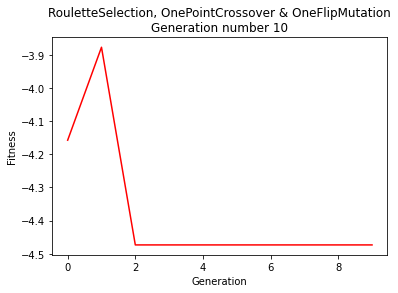

In [51]:
# PIPELINE GA ROULETTE SELECTION
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f1,
                           population=initial_population,
                           selection=RouletteSelection(num_individuals=SELECTED_SIZE),
                           crossover=OnePointCrossover(probability=CROSSOVER_PROBABILITY),
                           mutation=OneFlipMutation(probability=MUTATION_PROBABILITY))


In [52]:
solution = min(best, key=lambda x: f1(x.phenotype))
print(f"Optimal value with Roulette Selection\n x* = {solution.phenotype}, f(x*) = {f1(solution.phenotype)}")

Optimal value with Roulette Selection
 x* = [-2.734115347018573], f(x*) = -4.47343284158822


#### b) Para el segundo caso (ecuación 2) considerar la representación Gray, una población inicial 20 individuos del cual debe seleccionar 15 padres y crear 15 descendientes, una taza de cruce de 0.8, una tasa de mutación de 0.01, donde el cruce y la mutación son seleccionadas de forma aleatoria (Usando los mismos criterios del ejemplo mostrado en Colab-note) realizar lo siguiente:

• Usando el método de torneo para la selección de las nuevas generaciones (constantes de 20 individuos)

Generación: 1, número de descendientes: 8, intensidad: -1.3787891313741014
Generación: 2, número de descendientes: 14, intensidad: -1.5221679028499175
Generación: 3, número de descendientes: 6, intensidad: -0.5733893019767788
Generación: 4, número de descendientes: 12, intensidad: 0.0
Generación: 5, número de descendientes: 12, intensidad: 0.0
Generación: 6, número de descendientes: 12, intensidad: 0.0
Generación: 7, número de descendientes: 6, intensidad: 0.0
Generación: 8, número de descendientes: 12, intensidad: 0.0
Generación: 9, número de descendientes: 14, intensidad: 0.0
Generación: 10, número de descendientes: 12, intensidad: 0.0


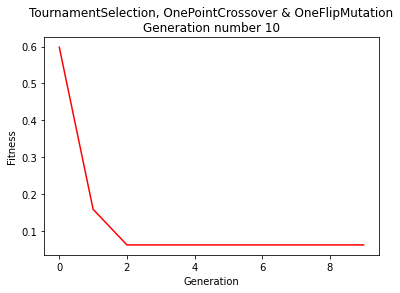

In [53]:
# GA CANONICAL HYPERPARAMETERS
MAX_GENERATION = 10
POPULATION_SIZE = 20
SELECTED_SIZE = 15
OFFSPRING_SIZE = 15
CROSSOVER_PROBABILITY = 0.8
MUTATION_PROBABILITY = 0.01

args2 = IndividualArguments(domain_2, eps_2, n_var_2, GEN_SIZE_2, Representation.GRAY)
initial_population = [Individual.newRandom(args2) for _ in range(POPULATION_SIZE)]

# PIPELINE GA
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f2,
                           population=initial_population,
                           selection=TournamentSelection(num_individuals=SELECTED_SIZE, tournament_size=5),
                           crossover=OnePointCrossover(probability=CROSSOVER_PROBABILITY),
                           mutation=OneFlipMutation(probability=MUTATION_PROBABILITY))



In [54]:
solution = min(best, key=lambda x: f2(x.phenotype))
print(f"Optimal value\n x* = {solution.phenotype}, f(x*) = {f2(solution.phenotype)}")

Optimal value
 x* = [-0.032258064516129004, 0.032258064516129004], f(x*) = 0.06287799982244661


#### Evalúe la intensidad de selección para cada uno de los métodos de selección en la pregunta (2).


Generación: 1, número de descendientes: 10, intensidad: 0.054470419851748435
Generación: 2, número de descendientes: 14, intensidad: -0.2767769588217424
Generación: 3, número de descendientes: 10, intensidad: 0.4298563236894312
Generación: 4, número de descendientes: 14, intensidad: 0.3103220341033755
Generación: 5, número de descendientes: 12, intensidad: 0.007617169489990124
Generación: 6, número de descendientes: 12, intensidad: 0.36354199746061994
Generación: 7, número de descendientes: 14, intensidad: 0.031155696408187234
Generación: 8, número de descendientes: 11, intensidad: 0.3759898575680947
Generación: 9, número de descendientes: 12, intensidad: 0.19365035339964554
Generación: 10, número de descendientes: 12, intensidad: 0.0


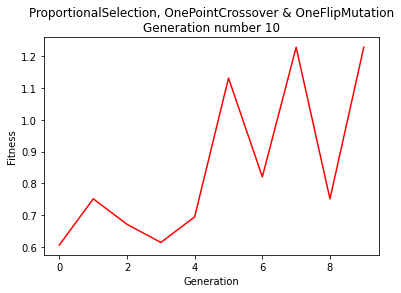

In [55]:
# PIPELINE GA PROPORTIONAL SELECTION
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f2,
                           population=initial_population,
                           selection=ProportionalSelection(num_individuals=SELECTED_SIZE, delta=10),
                           crossover=OnePointCrossover(probability=CROSSOVER_PROBABILITY),
                           mutation=OneFlipMutation(probability=MUTATION_PROBABILITY))


In [56]:
solution = min(best, key=lambda x: f2(x.phenotype))
print(f"Optimal value with Proportional Selection\n x* = {solution.phenotype}, f(x*) = {f2(solution.phenotype)}")

Optimal value with Proportional Selection
 x* = [-0.310092, -0.652859], f(x*) = 0.6060915255663886


Generación: 1, número de descendientes: 14, intensidad: -0.6514120332475529
Generación: 2, número de descendientes: 12, intensidad: -0.794176999228642
Generación: 3, número de descendientes: 9, intensidad: -0.6511624037632093
Generación: 4, número de descendientes: 12, intensidad: -0.6376484223307438
Generación: 5, número de descendientes: 8, intensidad: -0.7221807630292241
Generación: 6, número de descendientes: 12, intensidad: -0.267261241912424
Generación: 7, número de descendientes: 14, intensidad: 0.0
Generación: 8, número de descendientes: 9, intensidad: 0.0
Generación: 9, número de descendientes: 12, intensidad: 0.0
Generación: 10, número de descendientes: 10, intensidad: 0.0


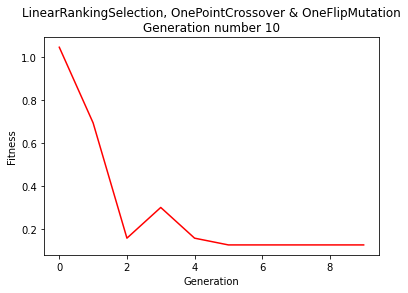

In [57]:
# PIPELINE GA LINEAR RANKING SELECTION
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f2,
                           population=initial_population,
                           selection=LinearRankingSelection(num_individuals=SELECTED_SIZE, s=2),
                           crossover=OnePointCrossover(probability=CROSSOVER_PROBABILITY),
                           mutation=OneFlipMutation(probability=MUTATION_PROBABILITY))


In [58]:
solution = min(best, key=lambda x: f2(x.phenotype))
print(f"Optimal value with Linear Ranking Selection\n x* = {solution.phenotype}, f(x*) = {f2(solution.phenotype)}")

Optimal value with Linear Ranking Selection
 x* = [-0.29032258064516125, 0.09677419354838701], f(x*) = 0.12794804157521777


Generación: 1, número de descendientes: 13, intensidad: 0.35933699614641157
Generación: 2, número de descendientes: 12, intensidad: 0.08996429872799405
Generación: 3, número de descendientes: 12, intensidad: -0.28539015664297845
Generación: 4, número de descendientes: 12, intensidad: -0.09954860318603369
Generación: 5, número de descendientes: 14, intensidad: -0.5025501686907531
Generación: 6, número de descendientes: 8, intensidad: 0.07114730173293546
Generación: 7, número de descendientes: 10, intensidad: -0.2886125769388526
Generación: 8, número de descendientes: 14, intensidad: -0.15047973029726092
Generación: 9, número de descendientes: 10, intensidad: -0.1567835793245688
Generación: 10, número de descendientes: 8, intensidad: -0.05592727668570905


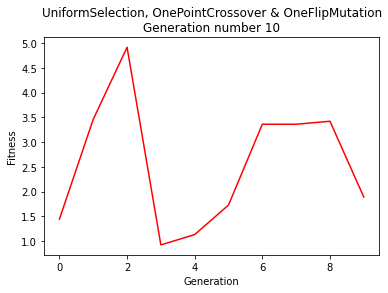

In [59]:
# PIPELINE GA UNIFORM SELECTION
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f1,
                           population=initial_population,
                           selection=UniformSelection(num_individuals=SELECTED_SIZE),
                           crossover=OnePointCrossover(probability=CROSSOVER_PROBABILITY),
                           mutation=OneFlipMutation(probability=MUTATION_PROBABILITY))


In [60]:
solution = min(best, key=lambda x: f2(x.phenotype))
print(f"Optimal value with Uniform Selection\n x* = {solution.phenotype}, f(x*) = {f2(solution.phenotype)}")


Optimal value with Uniform Selection
 x* = [-0.032258064516129004, -0.6774193548387097], f(x*) = 0.5979910729245589


Generación: 1, número de descendientes: 12, intensidad: -0.7186925182762784
Generación: 2, número de descendientes: 14, intensidad: -0.5920317026893579
Generación: 3, número de descendientes: 14, intensidad: -0.6553054807769523
Generación: 4, número de descendientes: 14, intensidad: -0.7348540834076062
Generación: 5, número de descendientes: 14, intensidad: -0.61702527442958
Generación: 6, número de descendientes: 12, intensidad: -0.527207494081365
Generación: 7, número de descendientes: 10, intensidad: -0.6497226630872053
Generación: 8, número de descendientes: 10, intensidad: 0.0
Generación: 9, número de descendientes: 8, intensidad: 0.0
Generación: 10, número de descendientes: 12, intensidad: 0.0


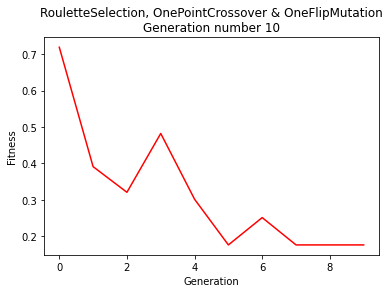

In [61]:
# PIPELINE GA ROULETTE SELECTION
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f2,
                           population=initial_population,
                           selection=RouletteSelection(num_individuals=SELECTED_SIZE),
                           crossover=OnePointCrossover(probability=CROSSOVER_PROBABILITY),
                           mutation=OneFlipMutation(probability=MUTATION_PROBABILITY))


In [62]:
solution = min(best, key=lambda x: f2(x.phenotype))
print(f"Optimal value with Roulette Selection\n x* = {solution.phenotype}, f(x*) = {f2(solution.phenotype)}")


Optimal value with Roulette Selection
 x* = [-0.29032258064516125, -0.22580645161290325], f(x*) = 0.17659860855783382


#### c) Para el tercer caso (ecuación 3) considerar la representación real, una población inicial 20 individuos del cual debe seleccionar 15 padres y crear 15 descendientes, una taza de cruce de 0.8, una tasa de mutación de 0.01, donde el cruce y la mutación son seleccionadas de forma aleatoria (Usando los mismos criterios del ejemplo mostrado en Colab-note) realizar lo siguiente:

• Usando el método de torneo para la selección de las nuevas generaciones (constantes de 20 individuos)

Generación: 1, número de descendientes: 8, intensidad: -0.824669677771154
Generación: 2, número de descendientes: 8, intensidad: -0.670121119711604
Generación: 3, número de descendientes: 12, intensidad: -0.5201507157935404
Generación: 4, número de descendientes: 10, intensidad: 0.0
Generación: 5, número de descendientes: 10, intensidad: 0.0
Generación: 6, número de descendientes: 12, intensidad: 0.0
Generación: 7, número de descendientes: 14, intensidad: 0.0
Generación: 8, número de descendientes: 10, intensidad: 0.0
Generación: 9, número de descendientes: 10, intensidad: 0.0
Generación: 10, número de descendientes: 13, intensidad: 0.0


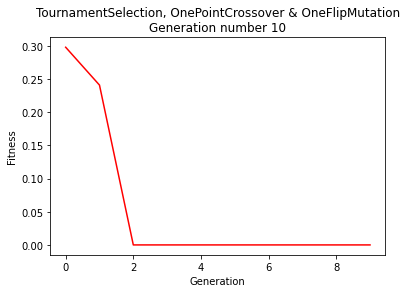

In [63]:
# GA CANONICAL HYPERPARAMETERS
MAX_GENERATION = 10
POPULATION_SIZE = 20
SELECTED_SIZE = 15
OFFSPRING_SIZE = 15
CROSSOVER_PROBABILITY = 0.8
MUTATION_PROBABILITY = 0.01

args3 = IndividualArguments(domain_3, eps_3, n_var_3, GEN_SIZE_3, Representation.DECIMAL)
initial_population = [Individual.newRandom(args3) for _ in range(POPULATION_SIZE)]

# PIPELINE GA
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f3,
                           population=initial_population,
                           selection=TournamentSelection(num_individuals=SELECTED_SIZE, tournament_size=5),
                           crossover=OnePointCrossover(probability=CROSSOVER_PROBABILITY),
                           mutation=OneFlipMutation(probability=MUTATION_PROBABILITY))


In [64]:
solution = min(best, key=lambda x: f3(x.phenotype))
print(f"Optimal value\n x* = {solution.phenotype}, f(x*) = {f3(solution.phenotype)}")

Optimal value
 x* = [19.430225, 21.690378, 48.341911, 55.998701], f(x*) = 0.00013006008873278982


Generación: 1, número de descendientes: 10, intensidad: -0.40446972583970886
Generación: 2, número de descendientes: 8, intensidad: -0.5866289122935003
Generación: 3, número de descendientes: 10, intensidad: -0.3941177402774332
Generación: 4, número de descendientes: 8, intensidad: 0.0
Generación: 5, número de descendientes: 12, intensidad: 0.0
Generación: 6, número de descendientes: 12, intensidad: 0.0
Generación: 7, número de descendientes: 8, intensidad: 0.0
Generación: 8, número de descendientes: 12, intensidad: 0.0
Generación: 9, número de descendientes: 10, intensidad: 0.0
Generación: 10, número de descendientes: 12, intensidad: 0.0


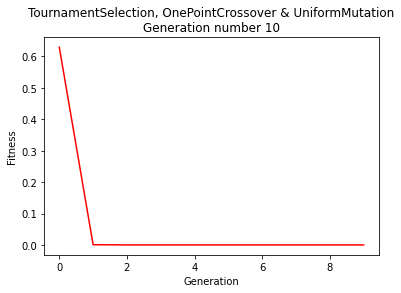

In [65]:
# GA CANONICAL HYPERPARAMETERS
MAX_GENERATION = 10
POPULATION_SIZE = 20
SELECTED_SIZE = 15
OFFSPRING_SIZE = 15
CROSSOVER_PROBABILITY = 0.8
MUTATION_PROBABILITY = 0.01

args3 = IndividualArguments(domain_3, eps_3, n_var_3, GEN_SIZE_3, Representation.DECIMAL)
initial_population = [Individual.newRandom(args3) for _ in range(POPULATION_SIZE)]

# PIPELINE GA
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f3,
                           population=initial_population,
                           selection=TournamentSelection(num_individuals=SELECTED_SIZE, tournament_size=5),
                           crossover=OnePointCrossover(probability=CROSSOVER_PROBABILITY),
                           mutation=UniformMutation(probability=MUTATION_PROBABILITY))


#### Evalúe la intensidad de selección para cada uno de los métodos de selección en la pregunta (2).


Generación: 1, número de descendientes: 12, intensidad: -0.2100246289496848
Generación: 2, número de descendientes: 4, intensidad: -0.3703581578321642
Generación: 3, número de descendientes: 8, intensidad: 0.2584035400524048
Generación: 4, número de descendientes: 12, intensidad: 0.4236744490510514
Generación: 5, número de descendientes: 13, intensidad: 0.16046222351602074
Generación: 6, número de descendientes: 10, intensidad: -0.16021677014602012
Generación: 7, número de descendientes: 15, intensidad: 0.033868075341864895
Generación: 8, número de descendientes: 10, intensidad: 0.30820480181575294
Generación: 9, número de descendientes: 14, intensidad: -0.1301430464553659
Generación: 10, número de descendientes: 13, intensidad: 0.04621262795342135


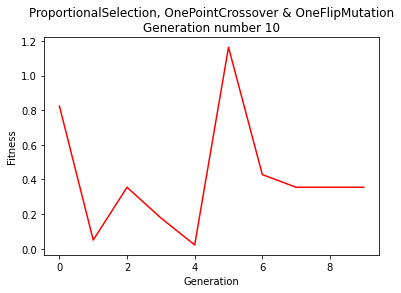

In [66]:
# PIPELINE GA PROPORTIONAL SELECTION
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f3,
                           population=initial_population,
                           selection=ProportionalSelection(num_individuals=SELECTED_SIZE, delta=10),
                           crossover=OnePointCrossover(probability=CROSSOVER_PROBABILITY),
                           mutation=OneFlipMutation(probability=MUTATION_PROBABILITY))


In [67]:
solution = min(best, key=lambda x: f3(x.phenotype))
print(f"Optimal value with Proportional Selection\n x* = {solution.phenotype}, f(x*) = {f3(solution.phenotype)}")

Optimal value with Proportional Selection
 x* = [16.214231, 35.649834, 34.417184, 57.040718], f(x*) = 0.022547564966860112


Generación: 1, número de descendientes: 12, intensidad: -0.28011957162084067
Generación: 2, número de descendientes: 10, intensidad: -0.42501470992714047
Generación: 3, número de descendientes: 12, intensidad: -0.31944072677017915
Generación: 4, número de descendientes: 12, intensidad: -0.34124119113958695
Generación: 5, número de descendientes: 8, intensidad: -0.695881294259701
Generación: 6, número de descendientes: 14, intensidad: -0.4961745417251101
Generación: 7, número de descendientes: 12, intensidad: 1.6366980589569193
Generación: 8, número de descendientes: 11, intensidad: -0.2672612419124245
Generación: 9, número de descendientes: 11, intensidad: 0.0
Generación: 10, número de descendientes: 8, intensidad: 0.0


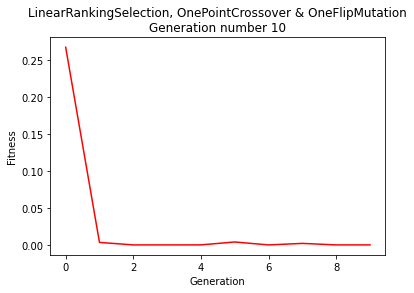

In [68]:
# PIPELINE GA LINEAR RANKING SELECTION
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f3,
                           population=initial_population,
                           selection=LinearRankingSelection(num_individuals=SELECTED_SIZE, s=2),
                           crossover=OnePointCrossover(probability=CROSSOVER_PROBABILITY),
                           mutation=OneFlipMutation(probability=MUTATION_PROBABILITY))


In [69]:
solution = min(best, key=lambda x: f3(x.phenotype))
print(f"Optimal value with Linear Ranking Selection\n x* = {solution.phenotype}, f(x*) = {f3(solution.phenotype)}")

Optimal value with Linear Ranking Selection
 x* = [12.367881, 32.925635, 49.828007, 55.659029], f(x*) = 6.515461588446051e-06


Generación: 1, número de descendientes: 12, intensidad: -0.04721117909262252
Generación: 2, número de descendientes: 8, intensidad: 0.49489253518500026
Generación: 3, número de descendientes: 14, intensidad: 0.1677893679174169
Generación: 4, número de descendientes: 8, intensidad: 0.29574122620387494
Generación: 5, número de descendientes: 10, intensidad: 0.33178554870865334
Generación: 6, número de descendientes: 12, intensidad: 0.134014262487081
Generación: 7, número de descendientes: 8, intensidad: 0.4173531046708375
Generación: 8, número de descendientes: 14, intensidad: 0.20234665973049173
Generación: 9, número de descendientes: 15, intensidad: -0.7004589536603969
Generación: 10, número de descendientes: 12, intensidad: 0.0811377450381224


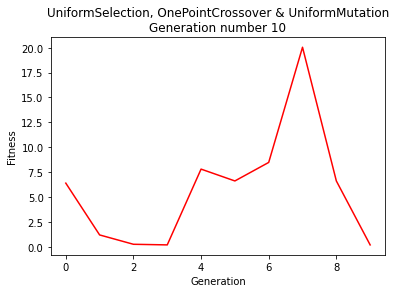

In [70]:
# PIPELINE GA UNIFORM SELECTION
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f3,
                           population=initial_population,
                           selection=UniformSelection(num_individuals=SELECTED_SIZE),
                           crossover=OnePointCrossover(probability=CROSSOVER_PROBABILITY),
                           mutation=UniformMutation(probability=MUTATION_PROBABILITY))


In [71]:
solution = min(best, key=lambda x: f3(x.phenotype))
print(f"Optimal value with Uniform Selection\n x* = {solution.phenotype}, f(x*) = {f3(solution.phenotype)}")


Optimal value with Uniform Selection
 x* = [25.747346, 35.649834, 49.972622, 32.601567], f(x*) = 0.17566488790935225


Generación: 1, número de descendientes: 10, intensidad: -0.12633395425117291
Generación: 2, número de descendientes: 8, intensidad: -0.530658273733258
Generación: 3, número de descendientes: 12, intensidad: -0.4085721407163115
Generación: 4, número de descendientes: 10, intensidad: -0.7793085944036462
Generación: 5, número de descendientes: 8, intensidad: -0.09697745809095208
Generación: 6, número de descendientes: 12, intensidad: -0.20558140667283245
Generación: 7, número de descendientes: 10, intensidad: -3.474396144861522
Generación: 8, número de descendientes: 10, intensidad: -0.2672612419124237
Generación: 9, número de descendientes: 12, intensidad: 0.0
Generación: 10, número de descendientes: 12, intensidad: 0.0


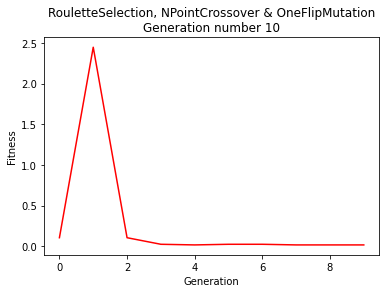

In [72]:
# PIPELINE GA ROULETTE SELECTION
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f3,
                           population=initial_population,
                           selection=RouletteSelection(num_individuals=SELECTED_SIZE),
                           crossover=NPointCrossover(probability=CROSSOVER_PROBABILITY, n=2),
                           mutation=OneFlipMutation(probability=MUTATION_PROBABILITY))


Generación: 1, número de descendientes: 10, intensidad: -0.04023567062068599
Generación: 2, número de descendientes: 8, intensidad: -0.26631301561881016
Generación: 3, número de descendientes: 8, intensidad: -0.49600038011654257
Generación: 4, número de descendientes: 12, intensidad: -0.48143631700058764
Generación: 5, número de descendientes: 13, intensidad: 0.2509541285835459
Generación: 6, número de descendientes: 8, intensidad: -0.272346988489923
Generación: 7, número de descendientes: 13, intensidad: -1.467267939837732
Generación: 8, número de descendientes: 13, intensidad: -0.26837203555909644
Generación: 9, número de descendientes: 14, intensidad: -0.31108260321473125
Generación: 10, número de descendientes: 6, intensidad: 0.2672612419124249


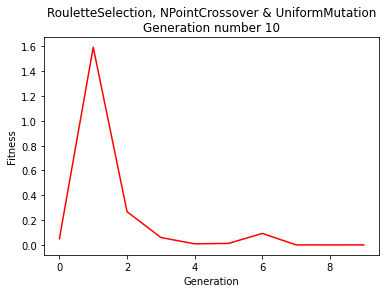

In [73]:
# PIPELINE GA ROULETTE SELECTION
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f3,
                           population=initial_population,
                           selection=RouletteSelection(num_individuals=SELECTED_SIZE),
                           crossover=NPointCrossover(probability=CROSSOVER_PROBABILITY, n=2),
                           mutation=UniformMutation(probability=MUTATION_PROBABILITY))


Generación: 1, número de descendientes: 12, intensidad: -0.21378289554090693
Generación: 2, número de descendientes: 10, intensidad: -0.027274437892465316
Generación: 3, número de descendientes: 10, intensidad: -0.5357086312227762
Generación: 4, número de descendientes: 10, intensidad: -0.3116478780451961
Generación: 5, número de descendientes: 12, intensidad: -0.3453806516740121
Generación: 6, número de descendientes: 8, intensidad: -0.716722421969362
Generación: 7, número de descendientes: 14, intensidad: -0.7071067811865472
Generación: 8, número de descendientes: 8, intensidad: 0.0
Generación: 9, número de descendientes: 10, intensidad: 0.0
Generación: 10, número de descendientes: 12, intensidad: 0.0


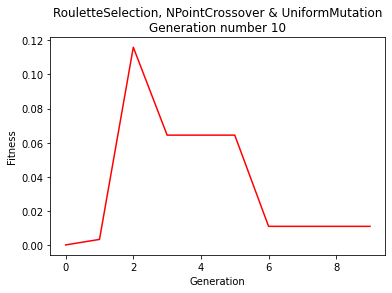

In [74]:
# PIPELINE GA ROULETTE SELECTION
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f3,
                           population=initial_population,
                           selection=RouletteSelection(num_individuals=SELECTED_SIZE),
                           crossover=NPointCrossover(probability=CROSSOVER_PROBABILITY, n=2),
                           mutation=UniformMutation(probability=MUTATION_PROBABILITY))


In [75]:
solution = min(best, key=lambda x: f3(x.phenotype))
print(f"Optimal value with Roulette Selection\n x* = {solution.phenotype}, f(x*) = {f3(solution.phenotype)}")


Optimal value with Roulette Selection
 x* = [12.367881, 32.925635, 48.852745, 52.832262], f(x*) = 0.00018216356887707657
